In [5]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt


## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [6]:
def my_binomial(k, n, p):
  return factorial(n) / (factorial(k) * factorial(n-k))*pow(p,k)*pow(1-p,n-k)


In [7]:
my_binomial(2, 3, 0.5)

0.375

In [8]:
# con 3 lanzamientos y una probabilidad de 0.5
dist = binom(3, 0.5)

# calcular para 2 exitos
dist.pmf(2)

0.375

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [9]:
# distribucion acumulada de 2 o menos exitos
dist.cdf(2)

0.875

In [10]:
7/8

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [18]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)


2

In [20]:
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

In [26]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(n, p))
  sim = np.unique(arr, return_counts=True)[1]/len(arr)
  teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, sim, color="red")
  plt.bar(values, teorica,color="blue", alpha=0.5)
  plt.title('{} experimentos'.format(num_trials))
  plt.show()



In [21]:
np.unique(arr, return_counts=True)

(array([0, 1, 2, 3]), array([ 9, 30, 43, 18]))

In [22]:
np.unique(arr, return_counts=True)[1]/len(arr)


array([0.09, 0.3 , 0.43, 0.18])

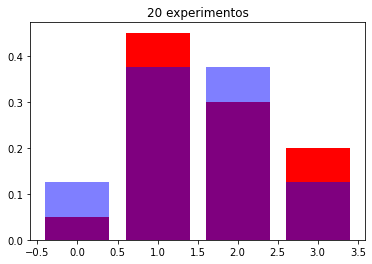

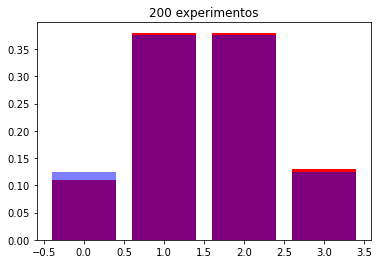

In [30]:
plot_hist(20)
plot_hist(200)


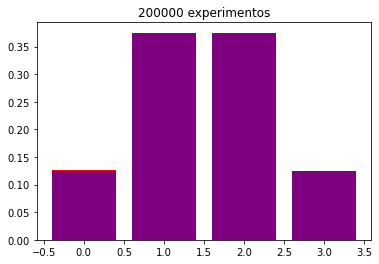

In [32]:
plot_hist(200000)
